# Clasificación multiclase

Vamos a dividir la columna de salary_in_usd  en tres clases para medir el salario: bajo, medio alto. De acuerdo a los percentiles

#### 1. importar librerias

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels

#### 2. abrir la data

In [86]:
path= r"C:\Users\darly\OneDrive\Escritorio\materialClaseIA\dataSets\dataSalarios"
df = pd.read_csv(path + r"\clasificacionBin.csv")  # ruta al archivo original

In [88]:
df.head()

,work_year,employment_type,salary_in_usd,employee_residence,company_location,company_size,high_experience,is_remote,job_group
0,2020,2,79833,14,12,0,0,0,5
1,2020,2,260000,32,29,2,1,0,5
2,2020,2,109024,20,18,1,1,1,2
3,2020,2,20000,23,20,2,0,0,0
4,2020,2,150000,55,48,0,1,1,2


#### 3. Convertir columna de salary_in_usd

In [90]:
# Calcular los valores de los percentiles
percentile_values = df['salary_in_usd'].quantile([0, 0.33, 0.66, 1.0]).values

# Etiquetas para las clases
labels = ['bajo', 'medio', 'alto']


# Clasificar el salario en clases usando los percentiles
df['salary_class'] = pd.cut(
    df['salary_in_usd'],
    bins=percentile_values,
    labels=labels,
    include_lowest=True,
    duplicates='drop'  # evita errores si dos percentiles tienen el mismo valor
)

In [93]:
df.head()

,work_year,employment_type,salary_in_usd,employee_residence,company_location,company_size,high_experience,is_remote,job_group,salary_class
0,2020,2,79833,14,12,0,0,0,5,medio
1,2020,2,260000,32,29,2,1,0,5,alto
2,2020,2,109024,20,18,1,1,1,2,medio
3,2020,2,20000,23,20,2,0,0,0,bajo
4,2020,2,150000,55,48,0,1,1,2,alto


In [95]:
# eliminar columnas que ya se codificaron
df.drop(columns=['salary_in_usd'], inplace=True)
df.head()

,work_year,employment_type,employee_residence,company_location,company_size,high_experience,is_remote,job_group,salary_class
0,2020,2,14,12,0,0,0,5,medio
1,2020,2,32,29,2,1,0,5,alto
2,2020,2,20,18,1,1,1,2,medio
3,2020,2,23,20,2,0,0,0,bajo
4,2020,2,55,48,0,1,1,2,alto


In [97]:
# transformar a labelEncoder
le = LabelEncoder()
df['salary_class'] = le.fit_transform(df['salary_class'])  # ahora y tendrá valores 0= alto, 1= bajo 2= medio
df.head()

,work_year,employment_type,employee_residence,company_location,company_size,high_experience,is_remote,job_group,salary_class
0,2020,2,14,12,0,0,0,5,2
1,2020,2,32,29,2,1,0,5,0
2,2020,2,20,18,1,1,1,2,2
3,2020,2,23,20,2,0,0,0,1
4,2020,2,55,48,0,1,1,2,0


#### 4. asignar y partir la data

In [100]:

# Variables independientes (X) y dependiente (y)
X = df.drop(columns=['salary_class'])
y = df['salary_class']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


#### Aplicar modelos y  evaluar

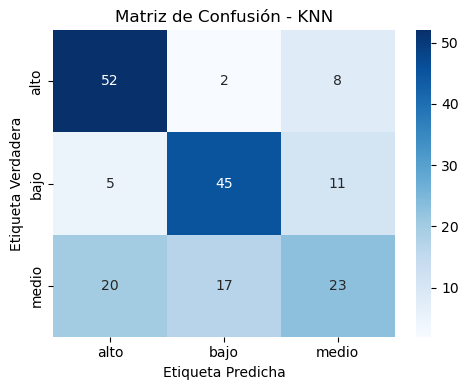

=== KNN ===
Reporte de Clasificación:
              precision    recall  f1-score   support

        alto       0.68      0.84      0.75        62
        bajo       0.70      0.74      0.72        61
       medio       0.55      0.38      0.45        60

    accuracy                           0.66       183
   macro avg       0.64      0.65      0.64       183
weighted avg       0.64      0.66      0.64       183




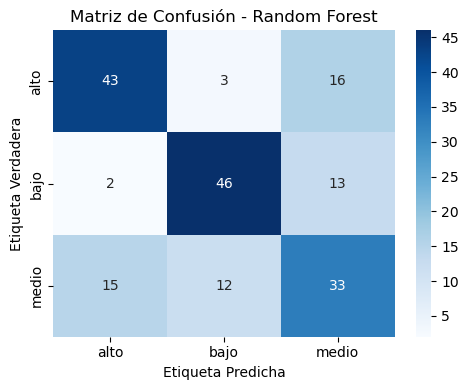

=== Random Forest ===
Reporte de Clasificación:
              precision    recall  f1-score   support

        alto       0.72      0.69      0.70        62
        bajo       0.75      0.75      0.75        61
       medio       0.53      0.55      0.54        60

    accuracy                           0.67       183
   macro avg       0.67      0.67      0.67       183
weighted avg       0.67      0.67      0.67       183




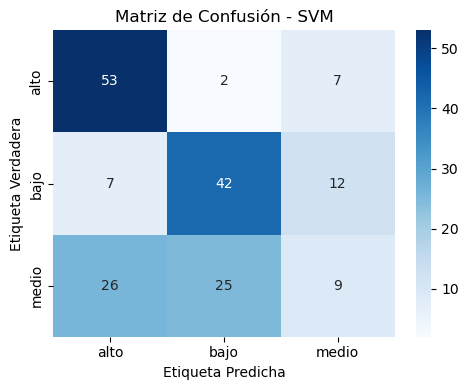

=== SVM ===
Reporte de Clasificación:
              precision    recall  f1-score   support

        alto       0.62      0.85      0.72        62
        bajo       0.61      0.69      0.65        61
       medio       0.32      0.15      0.20        60

    accuracy                           0.57       183
   macro avg       0.52      0.56      0.52       183
weighted avg       0.52      0.57      0.53       183




In [108]:

# Modelos
modelos = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Entrenar, predecir y evaluar
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    etiquetas_presentes = unique_labels(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=etiquetas_presentes)
    etiquetas_texto = le.inverse_transform(etiquetas_presentes)

    # Matriz de confusión
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=etiquetas_texto,
                yticklabels=etiquetas_texto)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.tight_layout()
    plt.show()

    # Resultados
    print(f"=== {nombre} ===")
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("=" * 40 + "\n")
